# WINE QUALITY PREDICTION

## Problem Statement:
#### For this project, we use Wine Quality dataset to build various classification models to predict whether a particular wine is “good quality” or not. Each wine in this dataset is given a “quality” score between 0 and 10. 

### Importing libraries

In [1]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

## Objective
The objectives of this project are as follows

1)To experiment with different classification methods to see which yields the highest accuracy

2)To determine which features are the most indicative of a good quality wine

In [2]:
# Reading the Dataset

df = pd.read_csv("wine.csv")
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [3]:
#information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [4]:
#description of the data set
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Checking missing values

In [5]:
# to check if there are any missing values
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

##### We see that,there are no null values present in data set

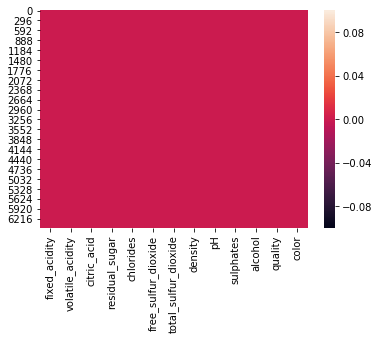

In [6]:
#representing heat map
sns.heatmap(df.isnull())

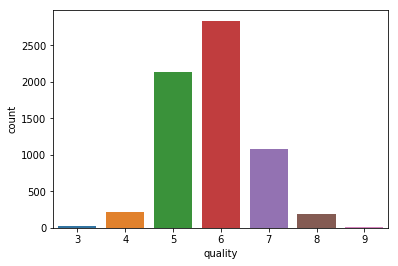

In [7]:
# count plot for the qualities of wine present 
sns.countplot(df["quality"])

##### The above countplot shows the number of wines present in each quality.

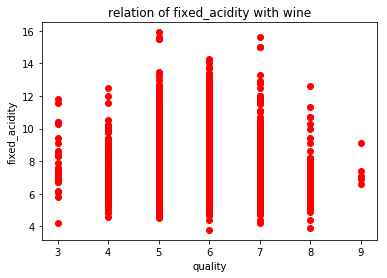

In [8]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(df['quality'], df['fixed_acidity'], color = 'red')
plt.title('relation of fixed_acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed_acidity')
plt.show()

##### The above Scatter plot shows us the variation of quality with fixed acidity

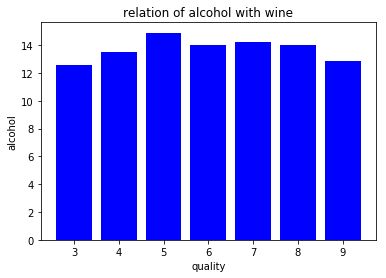

In [9]:
# checking the relation of alcohol with wine

plt.bar(df['quality'], df['alcohol'], color = 'blue')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

##### The above barplot shows the relation of alcohol with wine

### Visualization of Data

In [10]:
# Categorizing the quality of wine
quality = df["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")

In [11]:
# number of wines present in each quality
[(i, category.count(i)) for i in set(category)]

[('Medium', 4974), ('High', 1277), ('Low', 246)]

### Representation of barplot

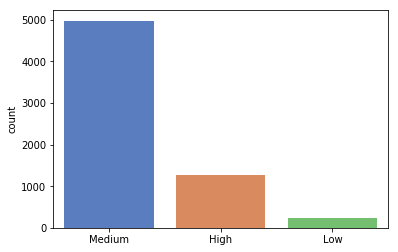

In [12]:
# Categorized wine quality
sns.countplot(category, palette="muted")

##### The above countplot shows us the number of wines in each category

In [13]:
# To count number of wines present in each colour 
df["color"].value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [14]:
# To convert the colour into binary
from sklearn.preprocessing import LabelEncoder
df['color']=LabelEncoder().fit_transform(df.color)
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


### Preparing Data for Modelling

In [15]:
quality = df["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")
category = pd.DataFrame(data=category, columns=["category"])
df = pd.concat([df, category], axis=1)
df.drop(columns="quality", axis=1, inplace=True)

In [16]:
# dividing the dataset into dependent and independent variables

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [17]:
# splitting the data into input and output
X = df.drop(["category"],axis=1)
X.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [18]:
y= df.category
y.head(10)

0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
5    Medium
6    Medium
7      High
8      High
9    Medium
Name: category, dtype: object

In [19]:
# Normalize feature variables

from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

C:\Users\prithvi raj\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\prithvi raj\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

### Random Forest

In [21]:
# RANDOM FOREST CLASSIFICATION

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2_train = model2.predict(X_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

# calculating the training and testing accuracies
print("Training accuracy :", model2.score(X_train, y_train))
print("Testing accuracy :", model2.score(X_test, y_test))

              precision    recall  f1-score   support

        High       0.70      0.60      0.64       307
         Low       0.53      0.14      0.22        66
      Medium       0.87      0.93      0.90      1252

   micro avg       0.84      0.84      0.84      1625
   macro avg       0.70      0.55      0.59      1625
weighted avg       0.82      0.84      0.82      1625

Training accuracy : 0.9936371100164204
Testing accuracy : 0.8356923076923077


C:\Users\prithvi raj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
# CONFUSION MATRIX
print(confusion_matrix(y_test, y_pred2))

[[ 183    0  124]
 [   1    9   56]
 [  78    8 1166]]


In [23]:
f1_train_model2 =f1_score(y_train,y_pred2_train,average=None)
print("f1_Score=",f1_train_model2)

f1_Score= [0.98659794 0.98591549 0.99583837]


In [24]:
f1_test_model2 = f1_score(y_test,y_pred2,average=None)
print("f1_Score=",f1_test_model2)

f1_Score= [0.64323374 0.21686747 0.89761355]


### Decision Tree

In [25]:
# DECISION TREE

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred2_train = model1.predict(X_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

# calculating the training and testing accuracies
print("Training accuracy :", model1.score(X_train, y_train))
print("Testing accuracy :", model1.score(X_test, y_test))

              precision    recall  f1-score   support

        High       0.55      0.64      0.59       307
         Low       0.26      0.27      0.27        66
      Medium       0.88      0.84      0.86      1252

   micro avg       0.78      0.78      0.78      1625
   macro avg       0.56      0.58      0.57      1625
weighted avg       0.79      0.78      0.78      1625

Training accuracy : 1.0
Testing accuracy : 0.7784615384615384


In [26]:
# CONFUSION MATRIX
print(confusion_matrix(y_test,y_pred1))

[[ 195    4  108]
 [   6   18   42]
 [ 154   46 1052]]


In [27]:
f1_train_model2 =f1_score(y_train,y_pred2_train,average=None)
print("f1_Score=",f1_train_model2)

f1_Score= [1. 1. 1.]


In [28]:
f1_test_model2 = f1_score(y_test,y_pred1,average=None)
print("f1_Score=",f1_test_model2)

f1_Score= [0.58912387 0.26865672 0.85737571]


### Feature Importance

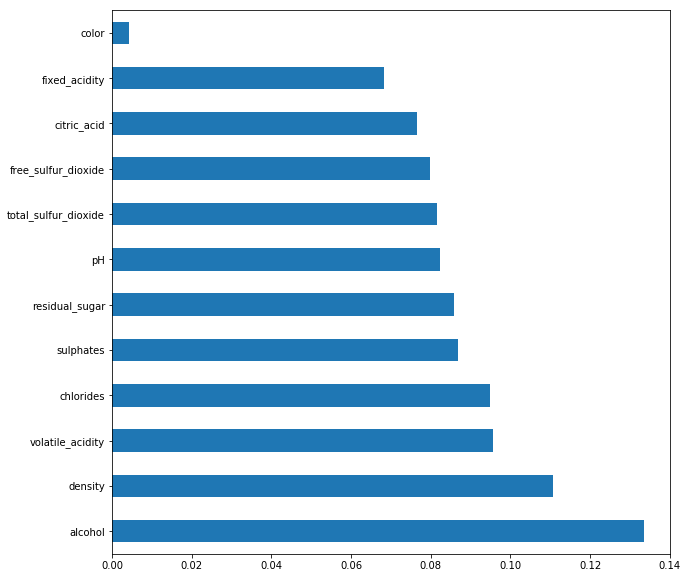

In [29]:
# Feature Importance

feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

#### By looking above barplot, we can say that good quality wines have higher levels of alcohol on average, have lower volatile acidity on average, higher levels of sulphates, and higher levels of residual sugar on average.

### EVALUATION OF BEST MODEL

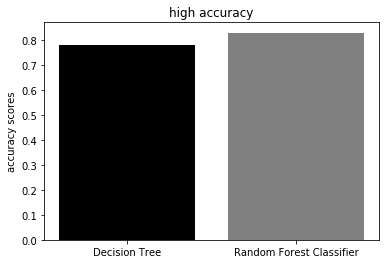

In [30]:
# To show which model has higher accuracy score
models=['Decision Tree','Random Forest Classifier']
acc_scores=[0.78,0.83]
plt.bar(models,acc_scores,color=['black','grey'])
plt.ylabel("accuracy scores")
plt.title("high accuracy")
plt.show()

### Predicting the quality using Random Forest classifier

In [31]:
print(model2.predict([[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1]]))

['High']


In [32]:
print(model2.predict([[7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,0]]))

['High']


In [33]:
print(model2.predict([[5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.800000,1]]))

['High']


## Conclusion
### The best model is RANDOM FOREST CLASSIFIER as both f1-scores and accuracy is higher in it than Decision Tree.